In [346]:
%load_ext autoreload
%autoreload

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [347]:
#check out plot_model
#check out model.evaluate

In [348]:
from pathlib import Path
import pandas as pd
from pmdarima.arima import auto_arima



IBBmonth = Path.cwd() / "data" / "Raw" / "IBBmonth.csv"
IBB = Path.cwd() / "data" / "Raw" / "IBB.csv"
ARKF = Path.cwd() / "data" / "Raw" / "ARKF.csv"
ARKK = Path.cwd() / "data" / "Raw" / "ARKK.csv"


data_t = pd.read_csv(IBB, usecols=[0,4], parse_dates=[0], header=0)

data_close = pd.DataFrame(data_t['Close'])
data_close.index = pd.to_datetime(data_t['Date'])

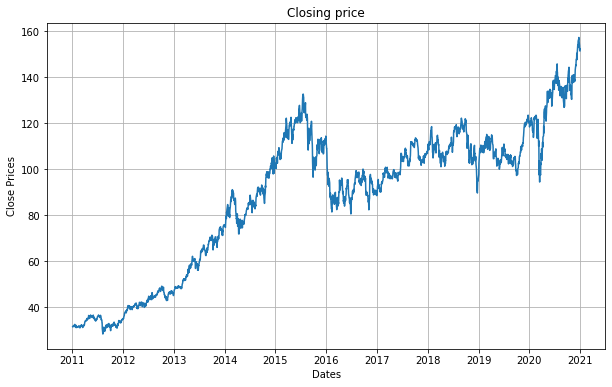

In [349]:
import matplotlib.pyplot as plt

#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(data_close['Close'])
plt.title('Closing price')
plt.show()

In [350]:
from Models.ARIMA import *
from Models.Helper import *
from Data.Raw import *
from Models.MLP import *

In [351]:
n_diffs = find_differencing(data_close['Close'].values)

Estimated differencing term: 1


In [352]:
#Split dataset
from sklearn.model_selection import train_test_split




def split_data(data, training_size):
    if training_size < 0 or training_size > 1:
        raise ValueError("Please use a value between 0 and 1 to split the dataset. Recommended values for the size of the training dataset are: 0.50, 0.67, 0.80.")
    train_data, test_data = data[0:int(len(data)*training_size)], data[int(len(data)*training_size):]
    
    train_data = train_data['Close'].values
    test_data = test_data['Close'].values
    
    print("Number of training samples:", len(train_data))
    print("Number of testing samples:", len(test_data))
    return training_size, train_data, test_data
    
    
#split_ratio, train_data, test_data = split_data(data_t, 0.67)


#
#test_index
#
#cutoff = round(len(data_close)/0.67)
#train_data = data_close.iloc[:cutoff,:]
#test_data = data_close.iloc[cutoff+1:,:]







train_data, test_data = train_test_split(data_close, test_size=0.33, shuffle = False)

print (train_data, test_data)




                 Close
Date                  
2011-01-03   31.430000
2011-01-04   31.299999
2011-01-05   31.549999
2011-01-06   31.696667
2011-01-07   31.683332
...                ...
2017-09-07  111.743332
2017-09-08  111.366669
2017-09-11  111.470001
2017-09-12  111.716667
2017-09-13  111.343330

[1686 rows x 1 columns]                  Close
Date                  
2017-09-14  110.686668
2017-09-15  110.606667
2017-09-18  110.723335
2017-09-19  109.986664
2017-09-20  110.916664
...                ...
2020-12-24  156.119995
2020-12-28  153.669998
2020-12-29  151.910004
2020-12-30  152.479996
2020-12-31  151.490005

[831 rows x 1 columns]


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5632.374, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5634.313, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5634.311, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5632.666, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5633.575, Time=0.34 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.569 seconds


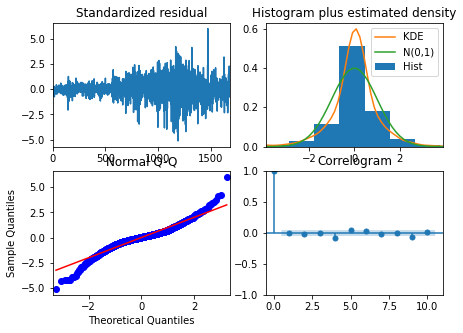

 ARIMA(0,1,0)(0,0,0)[0] intercept
(0, 1, 0)


In [353]:
arima_model_order =  auto_arima(train_data,start_p=0, d=n_diffs, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=0, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, seasonal_test='ocsb', error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=None, n_fits = 50)




arima_model_order.plot_diagnostics(figsize=(7,5))
plt.show()


print(arima_model_order)
print(arima_model_order.order)

In [354]:
#from pylab import rcParams
#rcParams['figure.figsize'] = 10, 6
#df_log = np.log(data_close)
#moving_avg = df_log.rolling(12).mean()
#std_dev = df_log.rolling(12).std()
#plt.legend(loc='best')
#plt.title('Moving Average')
#plt.plot(std_dev, color ="black", label = "Standard Deviation")
#plt.plot(moving_avg, color="red", label = "Mean")
#plt.legend()
#plt.show()

In [355]:
##split data into train and training set
#train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
#plt.figure(figsize=(10,6))
#plt.grid(True)
#plt.xlabel('Dates')
#plt.ylabel('Closing Prices')
#plt.plot(df_log, 'green', label='Train data')
#plt.plot(test_data, 'blue', label='Test data')
#plt.legend()

In [356]:
from statsmodels.tsa.arima_model import ARIMA



#
#model=ARIMA(data_close['Close'],order=(4,2,0))
#model_fit=model.fit()
#
#
## Actual vs Fitted
#model_fit.plot_predict(dynamic=False)
#plt.show()
#
#
#from matplotlib import pyplot
#residuals = pd.DataFrame(model_fit.resid)
#residuals.plot()
#pyplot.show()
## density plot of residuals
#residuals.plot(kind='kde')
#pyplot.show()
## summary stats of residuals
#print(residuals.describe())
#
#
#start = len(train_data)
#end = len(train_data) + len(test_data) - 1
#  
## Predictions for one-year against the test set
#predictions = model_fit.predict(start, end,
#                             typ = 'levels').rename("Predictions")
#  
## plot predictions and actual values
#predictions.plot(legend = True)
#data_close['Close'].plot(legend = True)
#
#calculate_error_measures(predictions, test_data)
#
#
##
##data_close['forecast']=model_fit.predict(start=len(train_data),end=1500,dynamic=True)
##data_close[['Close','forecast']].plot(figsize=(12,8))
##
##data_close.head()

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1685
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2811.149
Method:                       css-mle   S.D. of innovations              1.283
Date:                Fri, 25 Jun 2021   AIC                           5634.297
Time:                        18:33:26   BIC                           5666.875
Sample:                             1   HQIC                          5646.363
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0470      0.024      1.923      0.054      -0.001       0.095
ar.L1.D.Close     0.1494      0.219      0.681      0.496      -0.281       0.580
ar.L2.D.Close     0.7231      0.212     

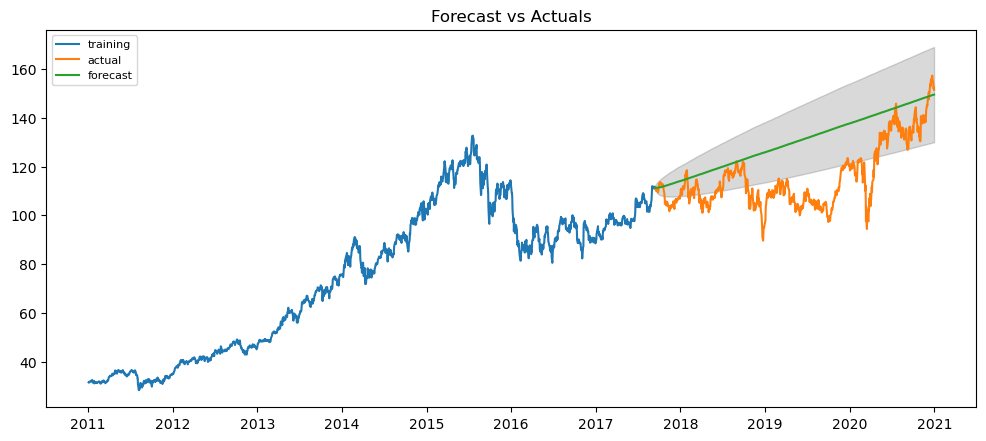

Mean Squared Error: 312.0294956777222
Mean Absolute Error: 14.768124378545851
R-squared score: -1.4655


[312.0294956777222, 14.768124378545851, -1.4655212372218651]

In [357]:
######################

import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
#plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np

from statsmodels.tsa.arima_model import ARIMA
#from statsmodels.tsa.arima.model import ARIMA

#from statsmodels.tsa.arima_model import ARIMAResults
#statsmodels.tsa.arima_model.ARMAResults.forecast





# Build Model
model = ARIMA(train_data, order=(2, 1, 2))  
fitted = model.fit()  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(len(test_data), alpha=0.50)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=0.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


calculate_error_measures(fc_series, test_data)




######################

In [358]:
model_predictions = stepwise_ARIMA(train_data, test_data, arima_model_order.order)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
test_set_range = data_t[int(len(data_t)*split_ratio):].index
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
print("Error measures for ARIMA:")
calculate_error_measures(test_data, model_predictions)

In [ ]:
#score = r2_score(test_data, model_predictions)
#print('R-squared score for the test set:', round(score,4))

In [ ]:
input_dim = find_input_dim(data_t['Close'])

In [ ]:


list_of_attributes = ['Close']

list_of_prev_t_instants = []
for i in range(1, input_dim+1):
    list_of_prev_t_instants.append(i)

df_new = create_regressor_attributes(data_close, list_of_attributes, list_of_prev_t_instants)

df_new.shape

In [ ]:
df_new.head()

In [ ]:
mlp_model = build_MLP_model(input_dim)

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(mlp_model)

In [ ]:
X_train, y_train, X_valid, y_valid, X_test, y_test = create_train_valid_test(df_new, 0.05, 0.05)

In [ ]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

X_train_scaled, y_train_scaled, X_valid_scaled, y_valid_scaled, X_test_scaled, y_test_scaled = scale_data(X_train, y_train, X_valid, y_valid, X_test, y_test, scaler)



In [ ]:

y_test_rescaled = scaler.inverse_transform(y_test_scaled)


In [ ]:
baseline_test(10, input_dim, X_train_scaled, y_train_scaled, X_valid_scaled, y_valid_scaled, X_test_scaled, y_test_rescaled, scaler)




In [ ]:
# wrap our model into a scikit-learn compatible classifier
print("[INFO] initializing model...")
model = KerasRegressor(build_fn=get_mlp_model, verbose=0, input_dim=input_dim)
# define a grid of the hyperparameter search space
hidden_layer_one = [25, 50, 100]
hidden_layer_two = [5, 10, 25]
learn_rate = [0.01, 0.001, 0.0001]
dropout = [0.1, 0.2 , 0.3, 0.4, 0.5]
batch_size = [4, 8, 16, 32, 64, 128]
epochs = [10, 50, 100, 500, 1000]
# create a dictionary from the hyperparameter grid
grid = dict(
    hidden_layer_one=hidden_layer_one,
    hidden_layer_two=hidden_layer_two,
    dropout=dropout,
    learn_rate=learn_rate,
    batch_size=batch_size,
    epochs=epochs
)


In [ ]:

optimized_MSE=[]
optimized_MAE=[]
optimized_r2=[]

for i in range(10):
    
    best_parameters = optimize_parameters(model, grid, X_train_scaled, y_train_scaled)

    
    hidden_layer_one=best_parameters['hidden_layer_one']
    hidden_layer_two=best_parameters['hidden_layer_two']
    dropout=best_parameters['dropout']
    learn_rate=best_parameters['learn_rate']
    batch_size=best_parameters['batch_size']
    epochs=best_parameters['epochs']
    

    best_model = get_mlp_model(input_dim, hidden_layer_one=hidden_layer_one, hidden_layer_two=hidden_layer_two,
        dropout=dropout, learn_rate=learn_rate)
    
    print("[INFO] training model...")
    history = best_model.fit(x=X_train_scaled, y=y_train_scaled,
        validation_data=(X_valid_scaled, y_valid_scaled),
        batch_size=batch_size,
        epochs=epochs)
    
    pred_test = best_model.predict(X_test_scaled)
    pred_test_rescaled = scaler.inverse_transform(pred_test)
    
    plot_comparison_graph(y_test_rescaled, pred_test_rescaled)
    
    plot_loss(history)
    

    
    measures = calculate_error_measures(y_test_rescaled, pred_test_rescaled)
    optimized_MSE.append(measures[0])
    optimized_MAE.append(measures[1])
    optimized_r2.append(measures[2])


In [ ]:


print(sum(optimized_MSE)/10)
print(sum(optimized_MAE)/10)
print(sum(optimized_r2)/10)


In [ ]:
#from keras.callbacks import EarlyStopping

#earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')

In [ ]:
import statsmodels.tsa.arima.model as sm

arima_model = sm.ARIMA(data_t, order=optimal_order)



In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor


# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('ann', KerasRegressor(build_fn=get_mlp_model, verbose=0, input_dim=input_dim)))
    level0.append(('arima', sm.ARIMA(data_t, order=arima_model_order.order)))
    # define meta learner model
    level1 = LinearRegression()
    # define the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model
    
# get a list of models to evaluate
def get_models():
    models = dict()
    models['ann'] = KerasRegressor(build_fn=get_mlp_model, verbose=0, input_dim=input_dim)
    models['arima'] = sm.ARIMA(data_t, order=arima_model_order.order)
    models['stacking'] = get_stacking()
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()
